In [ ]:
# Siddharth Nagepalli - 210968074
# AI Lab 2 - Ques 2

In [2]:
pip install -U gym

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install "gym[classic_control]"

  Using cached pygame-2.1.0-cp39-cp39-macosx_10_9_x86_64.whl (5.2 MB)
  Attempting uninstall: pygame
    Found existing installation: pygame 2.5.2
    Uninstalling pygame-2.5.2:
      Successfully uninstalled pygame-2.5.2
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install "gymnasium[classic_control]"

  Using cached pygame-2.5.2-cp39-cp39-macosx_10_9_x86_64.whl (12.8 MB)
  Attempting uninstall: pygame
    Found existing installation: pygame 2.1.0
    Uninstalling pygame-2.1.0:
      Successfully uninstalled pygame-2.1.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
import gymnasium as gym
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as stat

In [6]:
# loading the cartpole environment
env = gym.make("CartPole-v1",render_mode = "human")


In [7]:
# observation space for cartpole environment
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [8]:
# action space for cartpole environment
env.action_space

Discrete(2)

In [9]:
random_sample = env.action_space.sample()

In [10]:
print(random_sample)

0


In [11]:
# function to plot the cummalative reward vs no of iteration(episodes)

def plot_policy(final_rewards, policy_name:str=''):
    fig = plt.plot(range(len(final_rewards)), final_rewards)
    plt.grid()
    plt.title(policy_name + " Mean Reward {:.2f}, Std Reward {:.2f}".format(np.mean(final_rewards), np.min(final_rewards)))
    plt.ylabel('Cum Reward')
    plt.xlabel('Iteration')
    plt.ylim(0, max(final_rewards)*1.1)
    return fig

# Theta policy


In [12]:
# function to implement theta policy

def test_policy(policy_func): 
    final_rewards = [] # list to store total rewards for each episode
    episodes = 100     # no of episodes
    for episode in range(1,episodes+1):
        
        obs = env.reset()  # reset to a random position
        done = False
        episode_rewards = 0
        angle=obs[0][2]    # takes the third value (value of theta) from the observation space
        
        while done == False:
            env.render()
            action = policy_func(angle)
            obs, reward, done, info,unknown = env.step(action)
            episode_rewards += reward
          
        final_rewards.append(episode_rewards)
        print("Episode :{} Score:{}".format(episode,episode_rewards))
    env.close()
    return final_rewards

In [13]:
# Theta policy: if the pole is tilted to the left (θ<0), then push the cart to the left, and vice versa.

def theta_policy(angle):
    return 0 if angle < 0 else 1

In [14]:
# total rewards for each episode

theta_rewards = test_policy(theta_policy)

Episode :1 Score:11.0
Episode :2 Score:10.0
Episode :3 Score:10.0
Episode :4 Score:10.0
Episode :5 Score:10.0
Episode :6 Score:10.0
Episode :7 Score:9.0
Episode :8 Score:10.0
Episode :9 Score:10.0
Episode :10 Score:10.0
Episode :11 Score:10.0
Episode :12 Score:10.0
Episode :13 Score:11.0
Episode :14 Score:10.0
Episode :15 Score:10.0
Episode :16 Score:11.0
Episode :17 Score:10.0
Episode :18 Score:9.0
Episode :19 Score:10.0
Episode :20 Score:10.0
Episode :21 Score:9.0
Episode :22 Score:10.0
Episode :23 Score:10.0
Episode :24 Score:9.0
Episode :25 Score:10.0
Episode :26 Score:10.0
Episode :27 Score:10.0
Episode :28 Score:10.0
Episode :29 Score:10.0
Episode :30 Score:10.0
Episode :31 Score:10.0
Episode :32 Score:11.0
Episode :33 Score:10.0
Episode :34 Score:10.0
Episode :35 Score:10.0
Episode :36 Score:10.0
Episode :37 Score:10.0
Episode :38 Score:10.0
Episode :39 Score:10.0
Episode :40 Score:9.0
Episode :41 Score:9.0
Episode :42 Score:10.0
Episode :43 Score:10.0
Episode :44 Score:10.0
Epi

# Omega policy

In [15]:
env = gym.make("CartPole-v1",render_mode = "human")

In [16]:
# function to implement omega policy

def test_policy(policy_func): 
    final_rewards = []  # list to store total rewards at each episode
    episodes = 100      # no of episodes
    for episode in range(1,episodes+1):
        
        obs = env.reset()  # reset to a random position
        done = False
        episode_rewards = 0
        omega=obs[0][3]    # takes the fourth value (value of omega) from the observation space
        
        while done == False:
            env.render()
            action = policy_func(omega)
            obs, reward, done, info,unknown = env.step(action)
            episode_rewards += reward
          
        final_rewards.append(episode_rewards)
        print("Episode :{} Score:{}".format(episode,episode_rewards))
    env.close()
    return final_rewards

In [17]:
# Omega policy : when the pole is moving away from the vertical position (ω<0), push the cart to the left (action = 0). And vice versa

def omega_policy(omega):
    return 1 if omega > 0 else 0

In [18]:
# total rewards for each episode

omega_rewards = test_policy(omega_policy)

Episode :1 Score:10.0
Episode :2 Score:8.0
Episode :3 Score:9.0
Episode :4 Score:10.0
Episode :5 Score:10.0
Episode :6 Score:10.0
Episode :7 Score:9.0
Episode :8 Score:9.0
Episode :9 Score:10.0
Episode :10 Score:10.0
Episode :11 Score:9.0
Episode :12 Score:9.0
Episode :13 Score:9.0
Episode :14 Score:8.0
Episode :15 Score:10.0
Episode :16 Score:10.0
Episode :17 Score:9.0
Episode :18 Score:9.0
Episode :19 Score:10.0
Episode :20 Score:9.0
Episode :21 Score:10.0
Episode :22 Score:9.0
Episode :23 Score:10.0
Episode :24 Score:9.0
Episode :25 Score:9.0
Episode :26 Score:10.0
Episode :27 Score:11.0
Episode :28 Score:10.0
Episode :29 Score:9.0
Episode :30 Score:10.0
Episode :31 Score:9.0
Episode :32 Score:9.0
Episode :33 Score:10.0
Episode :34 Score:9.0
Episode :35 Score:10.0
Episode :36 Score:9.0
Episode :37 Score:9.0
Episode :38 Score:10.0
Episode :39 Score:10.0
Episode :40 Score:10.0
Episode :41 Score:10.0
Episode :42 Score:9.0
Episode :43 Score:9.0
Episode :44 Score:10.0
Episode :45 Score:9

# Cumulative rewards (based on steps) for theta policy

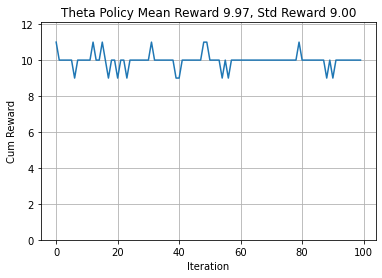

In [19]:
pt = plot_policy(theta_rewards, "Theta Policy")

# Cumulative rewards (based on steps) for omega policy

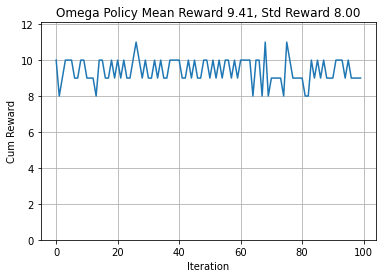

In [20]:
pt = plot_policy(omega_rewards, "Omega Policy")

#  Average rewards with standard deviation for theta policy

In [21]:
avg_theta=np.mean(theta_rewards)
stdev_theta=stat.stdev(theta_rewards)
print("Average rewards for theta policy: ", avg_theta)
print("Standard deviation for theta policy: ", stdev_theta)

Average rewards for theta policy:  9.97
Standard deviation for theta policy:  0.41328934272260254


#  Average rewards with standard deviation for omega policy

In [22]:
avg_omega=np.mean(omega_rewards)
stdev_omega=stat.stdev(omega_rewards)
print("Average rewards for omega policy: ", avg_omega)
print("Standard deviation for omega policy: ", stdev_omega)

Average rewards for omega policy:  9.41
Standard deviation for omega policy:  0.6830561152391922


# Comment on performance of policies

In [ ]:
# The theta policy was implemented for 100 episodes and the mean score was 9.97 with a standard deviation of 0.41.
# This tells us that in an single episode the pole was balanced for an average of almost ten (~10) steps after which it lost its balanace.

# The omega policy was implemented for 100 episodes and the mean score was 9.41 with a standard deviation of 0.68.
# This tells us that in an single episode the pole was balanced for an average of almost nine (~9) steps after which it lost its balanace.

# Both the policies performed almost similar to each other.